In [12]:
#Step 1: Data Collection
#First, download the dataset from kaggle 

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
label      0
message    0
dtype: int64
label
ham     4825
spam     747
Name: count, dtype: int64


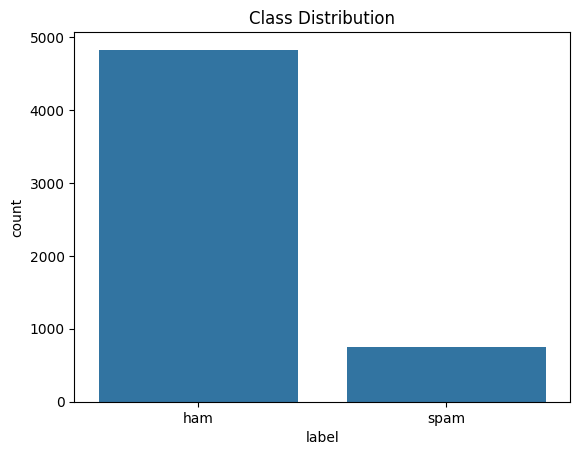

In [13]:
#Step 2: Data Preprocessing and Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns
df.columns = ['label', 'message']

# Explore the dataset
print(df.head())
print(df.describe())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Distribution of the target variable
print(df['label'].value_counts())

# Plot the distribution of the target variable
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()


In [14]:
#Step 3: Feature Engineering and Data Splitting
# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing and feature extraction
# Convert raw messages into numerical features using CountVectorizer and TfidfTransformer
count_vectorizer = CountVectorizer(stop_words='english')
tfidf_transformer = TfidfTransformer()

X_counts = count_vectorizer.fit_transform(df['message'])
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)


(3900, 8404) (1672, 8404)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

Confusion Matrix:
 [[1453    0]
 [  54  165]]
Accuracy Score: 0.9677033492822966


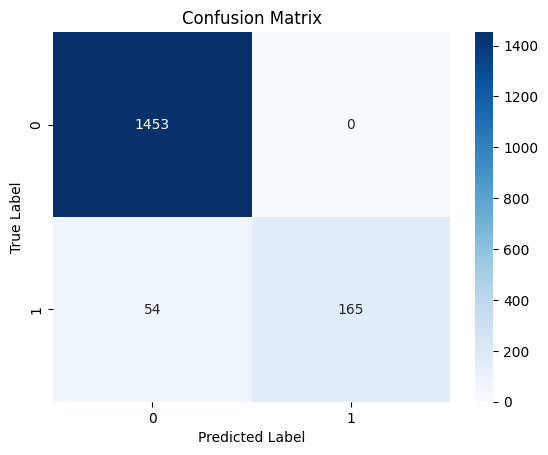

In [15]:
#Step 4: Model Training and Evaluation
# Initialize the model
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [16]:
#Step 5: Model Tuning (Optional)
from sklearn.model_selection import GridSearchCV

# Example for Multinomial Naive Bayes
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'alpha': 0.1}
Best Score: 0.9797435897435897
